In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
def generate_dict_line(line):
    # Splitting the string into key-value pairs
    key_value_pairs = line.split(", ")

    # Parsing each key-value pair and storing in a dictionary
    data_dict = {}
    for pair in key_value_pairs:
        key, value = pair.split(": ")
        if key in ['Ep_Reward', 'Initial Ene', 'GM_ene', 'atom_shift']:
            data_dict[key] = float(value) # Convert value to a numerical type (float)
        else:
            data_dict[key] = int(value)

    # The resulting dictionary
    return data_dict

In [3]:
data_line = "Ep_number: 1, Ep_Reward: -2310.0, Ep_tot_steps: 200, T_overlap: 34, T_nonbonded: 196, T_tot_all_min: 3, T_similar_min: 1, T_lower_ene_min: 0, T_higher_ene_min: 2, T_high_low_min: 2, T_unique_min: 2, Initial Ene:  13.3793, GM_ene:  13.6024, atom select: 2, atom_shift: 2.0"
data_dict = generate_dict_line(data_line)
data_dict

{'Ep_number': 1,
 'Ep_Reward': -2310.0,
 'Ep_tot_steps': 200,
 'T_overlap': 34,
 'T_nonbonded': 196,
 'T_tot_all_min': 3,
 'T_similar_min': 1,
 'T_lower_ene_min': 0,
 'T_higher_ene_min': 2,
 'T_high_low_min': 2,
 'T_unique_min': 2,
 'Initial Ene': 13.3793,
 'GM_ene': 13.6024,
 'atom select': 2,
 'atom_shift': 2.0}

In [4]:
episode_data = []
with open('../result_clusgym_ver50_expt1/episode_data.txt') as fh:
    for i, line in enumerate(fh):
        line = line.strip()
        #print(line)
        data_dict = generate_dict_line(line)
        #print(data_dict)
        episode_data.append(data_dict)
print("Total lines:", len(episode_data))
print(len(episode_data))
episode_data[22222]

Total lines: 55713
55713


{'Ep_number': 3113,
 'Ep_Reward': 361.1,
 'Ep_tot_steps': 34,
 'T_overlap': 7,
 'T_nonbonded': 0,
 'T_tot_all_min': 27,
 'T_similar_min': 16,
 'T_lower_ene_min': 5,
 'T_higher_ene_min': 6,
 'T_high_low_min': 11,
 'T_unique_min': 2195,
 'Initial Ene': 13.6988,
 'GM_ene': 12.8949,
 'atom select': 16,
 'atom_shift': -2.0}

In [6]:
N = 30000
episode_data = episode_data[:30000]

[Text(0.5, 0, 'episodes'), Text(0, 0.5, 'T_higher_ene_min')]

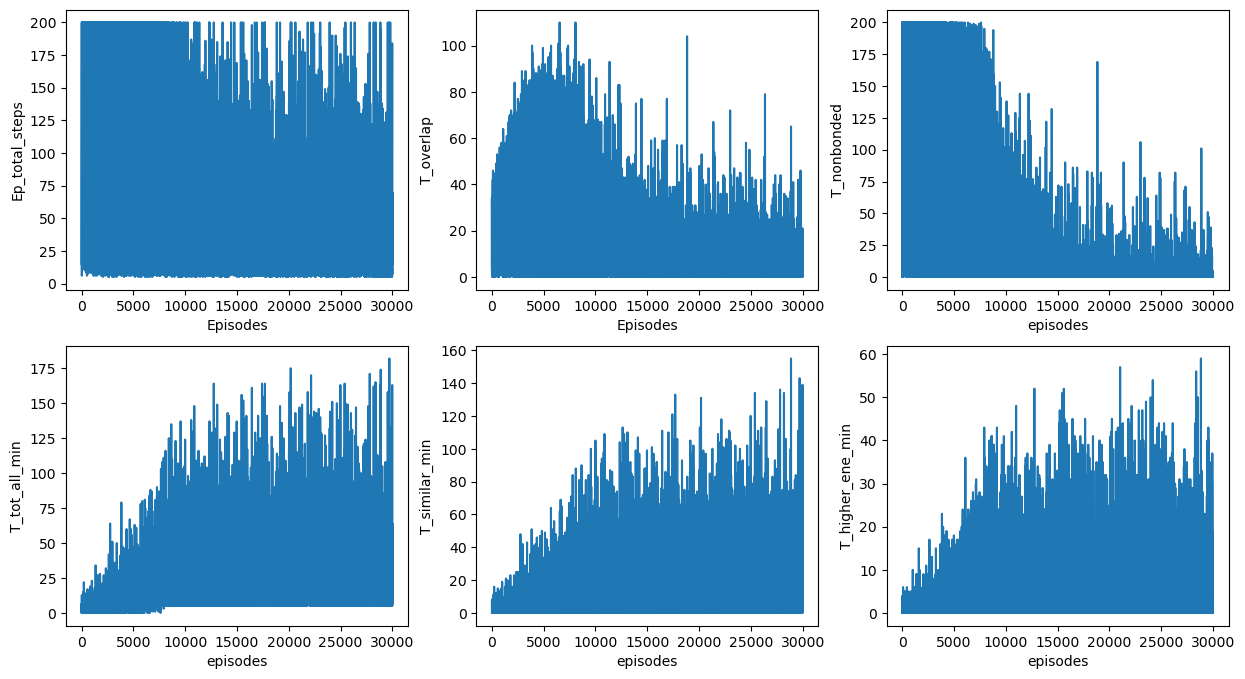

In [7]:
nrows = 2
ncols = 3
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))

Ep_total_steps = [ episode_data[i]['Ep_tot_steps'] for i, item in enumerate(episode_data)]
axs[0, 0].plot(Ep_total_steps)
#axs[0, 0].set_title('Ep_total_steps')
axs[0, 0].set(xlabel='Episodes', ylabel='Ep_total_steps')

#
T_overlap = [ episode_data[i]['T_overlap'] for i, item in enumerate(episode_data)]
axs[0, 1].plot(T_overlap)
#axs[0, 1].set_title('T_overlap')
axs[0, 1].set(xlabel='Episodes', ylabel='T_overlap')

#
T_nonbonded = [ episode_data[i]['T_nonbonded'] for i, item in enumerate(episode_data)]
axs[0, 2].plot(T_nonbonded)
#axs[0, 2].set_title('T_nonbonded')
axs[0, 2].set(xlabel='episodes', ylabel='T_nonbonded')

#
T_tot_all_min = [ episode_data[i]['T_tot_all_min'] for i, item in enumerate(episode_data)]
axs[1, 0].plot(T_tot_all_min)
#axs[1, 0].set_title('T_tot_all_min')
axs[1, 0].set(xlabel='episodes', ylabel='T_tot_all_min')

#
T_similar_min = [ episode_data[i]['T_similar_min'] for i, item in enumerate(episode_data)]
axs[1, 1].plot(T_similar_min)
#axs[1, 1].set_title('T_similar_min')
axs[1, 1].set(xlabel='episodes', ylabel='T_similar_min')

#
T_higher_ene_min = [ episode_data[i]['T_higher_ene_min'] for i, item in enumerate(episode_data)]
axs[1, 2].plot(T_higher_ene_min)
#axs[1, 2].set_title('T_higher_ene_min')
axs[1, 2].set(xlabel='episodes', ylabel='T_higher_ene_min')



In [ ]:
def plot_episode_data(key, x_label, y_label,N):
    value_list = []
    for i, item in enumerate(episode_data):
        data_dict = episode_data[i]
        value = data_dict[key] 
        value_list.append(value)
    #print(len(value_list))

    plt.plot(value_list[N:])
    plt.xlabel(x_label) 
    plt.ylabel(y_label) 

In [ ]:
plot_episode_data(key='Ep_tot_steps', x_label= 'Episodes', y_label='Ep_tot_steps', N=0)

In [ ]:
value_list = [ episode_data[i]['Ep_tot_steps'] for i in range(len(episode_data))]
print(value_list)

plt.plot(value_list[10000:])
plt.xlabel('Episodes') 
plt.ylabel('Ep_tot_steps') 

In [ ]:
sns.lineplot(value_list)

In [ ]:
plot_episode_data(key='T_nonbonded', x_label= 'Episodes', y_label='T_nonbonded', N=0)

In [ ]:
value_list = [ episode_data[i]['T_nonbonded'] for i in range(len(episode_data))]
print(value_list)
print(sum(value_list))
sns.displot(value_list, bins=200)
#plt.hist(value_list, bins=200)

In [ ]:
import pandas as pd
data = pd.DataFrame({
    'A': np.random.randn(50000),
    'B': np.random.rand(50000)
})

# Create the main figure and axis
fig, ax = plt.subplots()

# Main Seaborn plot (e.g., distribution of column 'A')
sns.histplot(data['A'], bins=50, ax=ax, color='green')

# Inset plot 1: Distribution of the first 10000 values in column 'A'
ax_inset1 = fig.add_axes([0.6, 0.6, 0.25, 0.25]) # adjust as necessary
sns.histplot(data['A'][:10000], bins=50, ax=ax_inset1, color='blue')
ax_inset1.set_title('First 10,000 of A')

# Inset plot 2: Distribution of the last 10000 values in column 'B'
ax_inset2 = fig.add_axes([0.6, 0.2, 0.25, 0.25]) # adjust as necessary
sns.histplot(data['B'][-10000:], bins=50, ax=ax_inset2, color='red')
ax_inset2.set_title('Last 10,000 of B')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.randn(50000)  # Replace this with your actual data

# Main plot
fig, ax = plt.subplots()
ax.hist(data, bins=50, alpha=0.6, color='g')

# Inset for the first 10000 values
ax_inset1 = fig.add_axes([0.5, 0.5, 0.4, 0.4]) # x, y, width, height as fractions of fig size
ax_inset1.hist(data[:10000], bins=50, alpha=0.6, color='b')
ax_inset1.set_title('First 10,000 values')

# Inset for the last 10000 values
ax_inset2 = fig.add_axes([0.5, 0.1, 0.4, 0.4]) # Position for the second inset
ax_inset2.hist(data[-10000:], bins=50, alpha=0.6, color='r')
ax_inset2.set_title('Last 10,000 values')

# Show the plot
plt.show()

In [ ]:
nrows = 2
ncols = 3
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))

Ep_total_steps = [ episode_data[i]['Ep_tot_steps'] for i, item in enumerate(episode_data)]
axs[0, 0].plot(Ep_total_steps)
#axs[0, 0].set_title('Ep_total_steps')
axs[0, 0].set(xlabel='Episodes', ylabel='Ep_total_steps')

#
T_overlap = [ episode_data[i]['T_overlap'] for i, item in enumerate(episode_data)]
axs[0, 1].plot(T_overlap)
#axs[0, 1].set_title('T_overlap')
axs[0, 1].set(xlabel='Episodes', ylabel='T_overlap')

#
T_nonbonded = [ episode_data[i]['T_nonbonded'] for i, item in enumerate(episode_data)]
axs[0, 2].plot(T_nonbonded)
#axs[0, 2].set_title('T_nonbonded')
axs[0, 2].set(xlabel='episodes', ylabel='T_nonbonded')

#
T_tot_all_min = [ episode_data[i]['T_tot_all_min'] for i, item in enumerate(episode_data)]
axs[1, 0].plot(T_tot_all_min)
#axs[1, 0].set_title('T_tot_all_min')
axs[1, 0].set(xlabel='episodes', ylabel='T_tot_all_min')

#
T_similar_min = [ episode_data[i]['T_similar_min'] for i, item in enumerate(episode_data)]
axs[1, 1].plot(T_similar_min)
#axs[1, 1].set_title('T_similar_min')
axs[1, 1].set(xlabel='episodes', ylabel='T_similar_min')

#
T_higher_ene_min = [ episode_data[i]['T_higher_ene_min'] for i, item in enumerate(episode_data)]
axs[1, 2].plot(T_higher_ene_min)
#axs[1, 2].set_title('T_higher_ene_min')
axs[1, 2].set(xlabel='episodes', ylabel='T_higher_ene_min')



In [ ]:
episode_data_list= ['Ep_number', 8065, ' Ep_Reward', 1091.5, ' Ep_tot_steps', 18, ' T_overlap', 5, ' T_nonbonded', 0, ' T_tot_all_min', 13, ' T_similar_min', 7, ' T_lower_ene_min', 5, ' T_higher_ene_min', 1, ' T_unique_min', 1682, ' Initial Ene', 14.0622, ' GM_ene', 12.8949, ' atom select', 16, ' atom_shift', -2.0]

nrows = 2
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 8))

Ep_total_steps = []
for i, item in enumerate(final_episode_list):
    Ep_total_steps.append(item[5])
print(Ep_total_steps)
axs[0, 0].plot(Ep_total_steps)
#axs[0, 0].set_title('Ep_total_steps')
axs[0, 0].set(xlabel='episodes', ylabel='Ep_total_steps')

#
T_overlap = []
for i, item in enumerate(final_episode_list):
    T_overlap.append(item[7])
print(T_overlap)
axs[0, 1].plot(T_overlap)
#axs[0, 1].set_title('T_overlap')
axs[0, 1].set(xlabel='episodes', ylabel='T_overlap')

#
T_nonbonded = []
for i, item in enumerate(final_episode_list):
    T_nonbonded.append(item[9])
print(T_nonbonded)
axs[1, 0].plot(T_nonbonded)
#axs[1, 0].set_title('T_nonbonded')
axs[1, 0].set(xlabel='episodes', ylabel='T_nonbonded')

#
T_tot_all_min = []
for i, item in enumerate(final_episode_list):
    T_tot_all_min.append(item[11])
axs[1, 1].plot(T_tot_all_min)
#axs[1, 1].set_title('T_tot_all_min')
axs[1, 1].set(xlabel='episodes', ylabel='T_tot_all_min')

